<a href="https://colab.research.google.com/github/khangdltUIT/CS115_Mathematics_cs/blob/main/Techniques_for_imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Techniques for processing imbalanced dataset ( brest cancer winconsin )
* SMOTE
* K-fold Cross-validation

## Download dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/REPORT/Course Project/Mathematics for CS/breast_cancer_wisconsin.csv' '/content/breast_cancer_wisconsin.csv'

## Read dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("breast_cancer_wisconsin.csv")

In [ ]:
features_name = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
X = df[features_name]
Y = df['diagnosis']

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = .2, random_state = 0)

## Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

## SMOTE

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE

### SVM SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

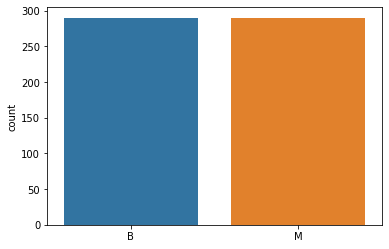

In [ ]:
svmsmote = SVMSMOTE(sampling_strategy = 1, random_state=0)
X_svmsmote, Y_svmsmote = svmsmote.fit_sample(train_X, train_Y)
sns.countplot(Y_svmsmote)

### Boderline SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

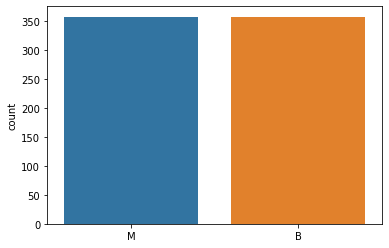

In [ ]:
bosmote = BorderlineSMOTE(sampling_strategy = 1, random_state=0)
X_bosmote, Y_bosmote = bosmote.fit_sample(X, Y)
sns.countplot(Y_bosmote)

## Performance 

In [ ]:
from sklearn.linear_model import LogisticRegression

define measurance

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [ ]:
log_model = LogisticRegression()
lr_notsmote = log_model.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Not use smote

In [ ]:
lr_bosmote = log_model.fit(X_bosmote, Y_bosmote)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Use Boderline smote

In [ ]:
lr_svmsmote = log_model.fit(X_svmsmote, Y_svmsmote)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Performance between them

In [ ]:
print_score(lr_notsmote, train_X, train_Y, test_X, test_Y, train = True)
print_score(lr_notsmote, train_X, train_Y, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 94.95%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.975089    0.908046  0.949451    0.941567      0.950777
recall       0.944828    0.957576  0.949451    0.951202      0.949451
f1-score     0.959720    0.932153  0.949451    0.945937      0.949723
support    290.000000  165.000000  0.949451  455.000000    455.000000
_______________________________________________
Confusion Matrix: 
 [[274  16]
 [  7 158]]

Test Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.983871   0.884615  0.938596    0.934243      0.942950
recall      0.910448   0.978723  0.938596    0.944586      0.938596
f1-score    0.945736   0.929293  0.938596    0.937515      0.938957
support    67.000000  47.000000  0.938596  114.000000    114.000000
___

In [ ]:
print_score(lr_bosmote, X_bosmote, Y_bosmote, test_X, test_Y, train = True)
print_score(lr_bosmote, X_bosmote, Y_bosmote, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 93.28%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.927978    0.937677  0.932773    0.932827      0.932827
recall       0.938375    0.927171  0.932773    0.932773      0.932773
f1-score     0.933148    0.932394  0.932773    0.932771      0.932771
support    357.000000  357.000000  0.932773  714.000000    714.000000
_______________________________________________
Confusion Matrix: 
 [[335  22]
 [ 26 331]]

Test Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.983871   0.884615  0.938596    0.934243      0.942950
recall      0.910448   0.978723  0.938596    0.944586      0.938596
f1-score    0.945736   0.929293  0.938596    0.937515      0.938957
support    67.000000  47.000000  0.938596  114.000000    114.000000
___

In [ ]:
print_score(lr_svmsmote, X_svmsmote, Y_svmsmote, test_X, test_Y, train = True)
print_score(lr_svmsmote, X_svmsmote, Y_svmsmote, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 94.14%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.938356    0.944444  0.941379    0.941400      0.941400
recall       0.944828    0.937931  0.941379    0.941379      0.941379
f1-score     0.941581    0.941176  0.941379    0.941379      0.941379
support    290.000000  290.000000  0.941379  580.000000    580.000000
_______________________________________________
Confusion Matrix: 
 [[274  16]
 [ 18 272]]

Test Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.983871   0.884615  0.938596    0.934243      0.942950
recall      0.910448   0.978723  0.938596    0.944586      0.938596
f1-score    0.945736   0.929293  0.938596    0.937515      0.938957
support    67.000000  47.000000  0.938596  114.000000    114.000000
___

## Combine oversampling and Undersampling

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smk = SMOTETomek()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


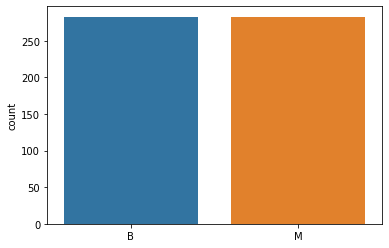

In [ ]:
X_cb, Y_cb = smk.fit_sample(train_X, train_Y)
sns.countplot(Y_cb)

In [ ]:
lr_cb = log_model.fit(X_cb, Y_cb)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print_score(lr_cb, X_cb, Y_cb, test_X, test_Y, train = True)
print_score(lr_cb, X_cb, Y_cb, test_X, test_Y, train = False)

Train Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    B           M  accuracy   macro avg  weighted avg
precision    0.958621    0.981884  0.969965    0.970252      0.970252
recall       0.982332    0.957597  0.969965    0.969965      0.969965
f1-score     0.970332    0.969589  0.969965    0.969960      0.969960
support    283.000000  283.000000  0.969965  566.000000    566.000000
_______________________________________________
Confusion Matrix: 
 [[278   5]
 [ 12 271]]

Test Result:
Accuracy Score: 93.86%
_______________________________________________
CLASSIFICATION REPORT:
                   B          M  accuracy   macro avg  weighted avg
precision   0.983871   0.884615  0.938596    0.934243      0.942950
recall      0.910448   0.978723  0.938596    0.944586      0.938596
f1-score    0.945736   0.929293  0.938596    0.937515      0.938957
support    67.000000  47.000000  0.938596  114.000000    114.000000
___